In [0]:
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, scale
from sklearn.model_selection import train_test_split
from sklearn.externals import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import os
from numpy.random import seed
seed(1)

In [0]:
drive.mount('/content/drive', force_remount=True)
%ls

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
drive/  sample_data/


In [0]:
%cd "drive/My Drive/ChiragBTP"
%ls

/content/drive/My Drive/ChiragBTP
 acf_1dcnn_v2.ipynb                'GUI for Audio Scene Recognition (1).ipynb'
 acf_awgn_features.py               models/
 acf_features.py                    plot_acf_features.py
 ACF_plots.ipynb                    plots/
 cnn_1d.py                          raw_data/
 cnn_1d_v2.py                       sandbox.ipynb
 cnn.py                             sets_labels/
 code/                              spectrogram_generator.py
'Confusion plots.ipynb'             split_audio_file.py
 create_ACF_train-test_sets.ipynb  'Splitting audio samples.ipynb'
 create_MFCC_dataset.py             svm.ipynb
 extract_features.py                svm.py
 feature_extraction.ipynb           Untitled.py
 features/


In [0]:
train_set_file = os.path.join('sets_labels', 'ACF', 'toy', 'clean', 'train_set.csv')
test_set_file = os.path.join('sets_labels', 'ACF', 'toy', 'clean', 'test_set.csv')
train_label_file = os.path.join('sets_labels', 'ACF', 'toy', 'clean', 'train_labels.csv')
test_label_file = os.path.join('sets_labels', 'ACF', 'toy', 'clean', 'test_labels.csv')

plot_file = os.path.join('plots', 'ACF', 'SVM', 'without_gridsearch_v1.png')
weight_file = os.path.join('models','ACF','SVM','weight_without_gridsearch_v1.sav')
info_file = os.path.join('models', 'ACF', 'SVM', 'without_gridsearch_v1.txt')
scaler_file = os.path.join('models', 'ACF', 'SVM', 'scaler_without_gridsearch_v1.sav')

In [0]:
X_train = np.loadtxt(train_set_file)
X_test = np.loadtxt(test_set_file)
Y_train = np.loadtxt(train_label_file)
Y_test = np.loadtxt(test_label_file)

In [0]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
#scaler_loaded = joblib.load(scaler_file) - to load it
#scaler_loaded.transform(X) - to apply it
X_test_scaled = scaler.transform(X_test)

joblib.dump(scaler, scaler_file)

['models/ACF/SVM/scaler_without_gridsearch_v1.sav']

In [0]:
print('fitting...')
clf = SVC(C=1000, gamma=0.001, kernel='rbf', verbose=5)
clf.fit(X_train_scaled, Y_train)
joblib.dump(clf, weight_file)

# loaded_model = joblib.load(weight_file)
# acc = loaded_model.score(X_test_scaled, Y_test)

fitting...
[LibSVM]

['models/ACF/SVM/weight_without_gridsearch_v1.sav']

In [0]:
acc = clf.score(X_test_scaled, Y_test)
print("acc=%0.3f" % acc)

y_pred = clf.predict(X_test_scaled)
conf_mat = confusion_matrix(Y_test,y_pred)
clf_report = classification_report(Y_test,y_pred)

print(conf_mat)
print(clf_report)

acc=0.791
[[2786 1237]
 [ 436 3542]]
              precision    recall  f1-score   support

         0.0       0.86      0.69      0.77      4023
         1.0       0.74      0.89      0.81      3978

    accuracy                           0.79      8001
   macro avg       0.80      0.79      0.79      8001
weighted avg       0.80      0.79      0.79      8001



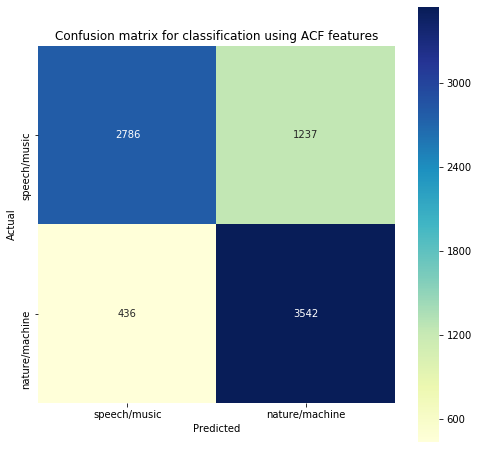

In [0]:
fig, ax = plt.subplots(figsize=(8,8))         
ax = sns.heatmap(conf_mat, annot=True, fmt='d', square=True, cmap="YlGnBu", xticklabels=['speech/music', 'nature/machine'], yticklabels=['speech/music', 'nature/machine'])
               
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix for classification using ACF features')
#plt.show()
plt.savefig(plot_file)

In [0]:
file_obj = open(info_file, 'w')
params = clf.get_params(deep=False)
file_obj.write("PARAMETERS\n")
for k in params.keys():
  file_obj.write("{} : {}\n".format(k, params[k]))

file_obj.write("\n\nTest accuracy = %0.3f\n\n" % acc)
file_obj.write("CLASSIFICATION REPORT\n")
file_obj.write(clf_report)

file_obj.write("\n\nFILE PATHS\n")
file_obj.write("Training set : {}\n".format(train_set_file))
file_obj.write("Testing set : {}\n".format(test_set_file))
file_obj.write("Weight file : {}\n".format(weight_file))
file_obj.write("Scaler file : {}\n".format(scaler_file))
file_obj.write("CM plot file : {}\n".format(plot_file))
file_obj.close()